# Code for 3f8 inference lab: classification

### import everything

In [1]:
import numpy as np
from scipy import optimize

### Given functions

In [2]:
import matplotlib.pyplot as plt

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
def plot_data_internal(X, y):
    x_min , x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min , y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min , x_max , 100), \
                         np.linspace(y_min , y_max , 100))
    plt.figure(figsize=(20,20))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', markersize=2, label = 'Class 0')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', markersize=2, label = 'Class 1')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.grid()
    plt.show()

##
# x: input to the logistic function
#
def logistic(x): return 1.0 / (1.0 + np.exp(-x))

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# w: current parameter values
#
def compute_average_ll(X, y, w):
    output_prob = logistic(np.dot(X, w))
#     output_prob[output_prob==0] = np.dot(X_train[output_prob==0],w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

##
# ll: 1d array with the average likelihood per data point and dimension equal
# to the number of training epochs.
#
def plot_ll(ll_train,ll_test):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll_train) + 2)
    plt.ylim(min(ll_train) - 0.1, max(ll_train) + 0.1)
    ax.plot(np.arange(1, len(ll_train) + 1), ll_train, 'k-', label='Train set')
    ax.plot(np.arange(1, len(ll_test) + 1), ll_test, 'g-', label='Test set')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

##
# x: 2d array with input features at which to compute predictions.
#
# (uses parameter vector w which is defined outside the function's scope)
#
def predict_for_plot(x):
    x_tilde = np.concatenate((x, np.ones((x.shape[ 0 ], 1 ))), 1)
#     x_tilde = x
    return logistic(np.dot(x_tilde , w))

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# predict: function that recives as input a feature matrix and returns a 1d
# vector with the probability of class 1.
def plot_predictive_distribution(X, y, predict):
    xx, yy = plot_data_internal(X, y)
    
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)
#     X_predict = np.column_stack((X_predict,np.ones(np.size(X_predict,0))))
    Z = predict(X_predict)
    Z = Z.reshape(xx.shape)
    
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.grid()
    plt.imshow(Z,interpolation="bilinear", origin="lower", cmap="RdBu", extent=(np.amin(xx), np.amax(xx), np.amin(yy), np.amax(yy)), zorder=0)
    plt.show()

##
# l: hyper -parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
def expand_inputs(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X , Z2)
    return np.exp(-0.5 / l**2 * r2)

##
# x: 2d array with input features at which to compute the predictions
# using the feature expansion
#
# (uses parameter vector w and the 2d array X with the centers of the basis
# functions for the feature expansion , which are defined outside the function's
# scope)
#
def predict_for_plot_expanded_features(x):
    x_expanded = expand_inputs(l, x, C)
    x_tilde = np.concatenate((x_expanded , np.ones((x_expanded.shape[ 0 ], 1 ))), 1)
#     x_tilde = x_expanded
    return logistic(np.dot(x_tilde , w))




### load and visualise data

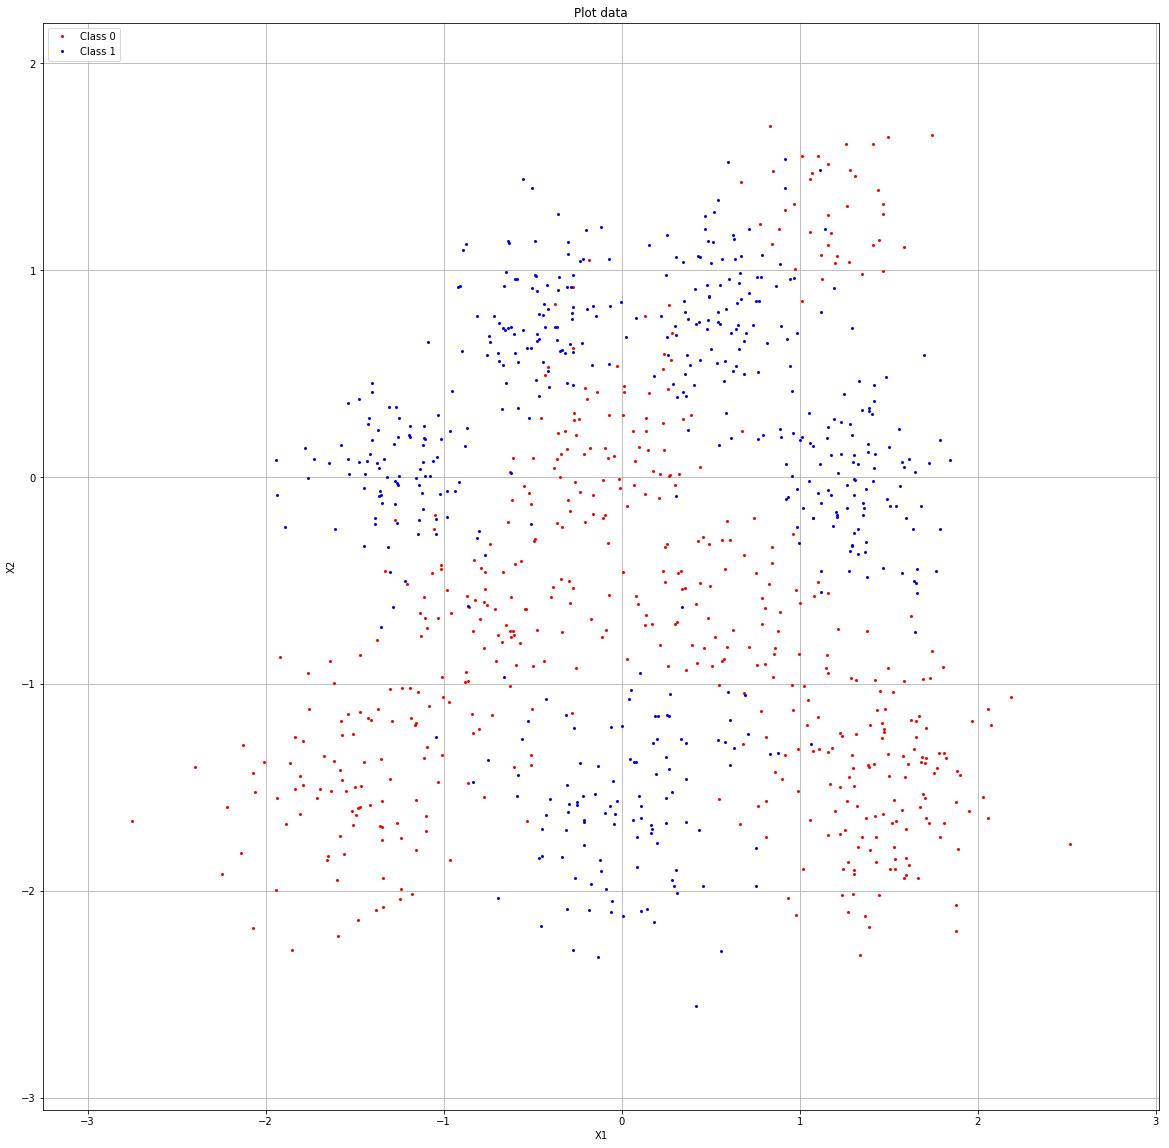

In [3]:
X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

plot_data(X,y)

Definitely needs non-linear classifier.

train set should be significantly larger than test set.

In [4]:
# Shuffle the data for train-test split
np.random.seed(420) # use same random seed for reproducible results

shuffled_indices = np.random.permutation(y.shape[0])
X_shuffled = X[shuffled_indices,:]
y_shuffled = y[shuffled_indices]

# Linear classifier

In [5]:

#Train test split
train_portion = 0.8
train_size = int(np.size(X,0)*train_portion)

X_train = X_shuffled[:train_size,:]
X_train = np.column_stack([X_train, np.ones(X_train.shape[0])])
y_train = y_shuffled[:train_size]

X_test = X_shuffled[train_size:,:]
X_test = np.column_stack([X_test, np.ones(X_test.shape[0])])
y_test = y_shuffled[train_size:]

Training curve


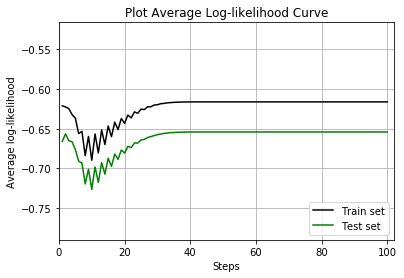

-0.6162482398
-0.654062433248


In [6]:
# Number of iterations
epochs = 100
# Randomly initialise weights
w = np.random.randn(X_train.shape[1])
# Log-likelihood arrays for plotting performance over iterations
ll_train = []
ll_test = []

# Training begins
for i in range(epochs):
    eta = 1.0/(i+100) # learning rate schedule
    w = w + eta*(np.dot(y_train - logistic(np.dot(X_train, w)), X_train))
    ll_train.append(compute_average_ll(X_train,y_train,w))
    ll_test.append(compute_average_ll(X_test,y_test,w))
    
ll_train = np.array(ll_train)
ll_test = np.array(ll_test)
print('Training curve')
plot_ll(ll_train,ll_test)
print(ll_train[-1])
print(ll_test[-1])

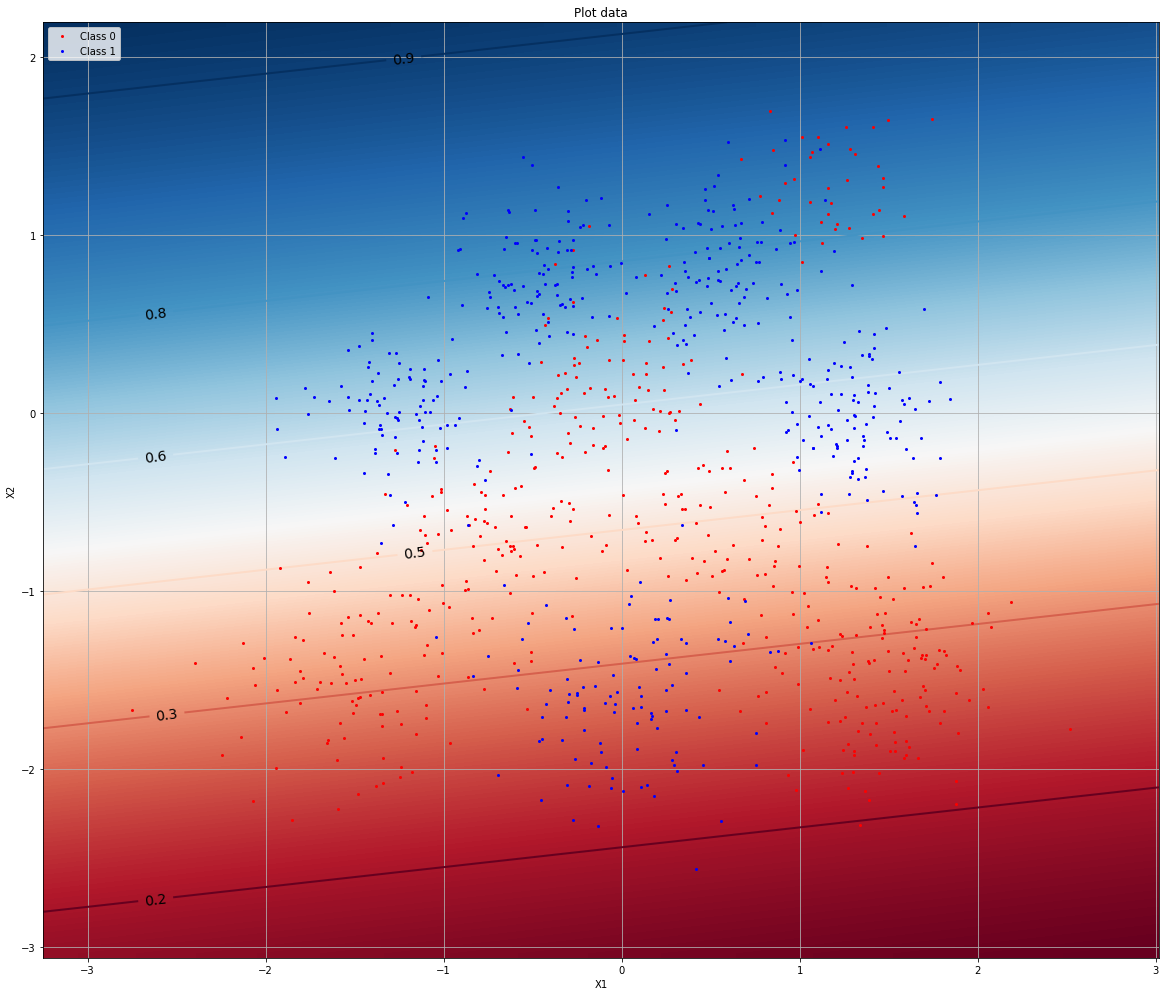

In [7]:
plot_predictive_distribution(X, y, predict_for_plot)

### Linear classifier report

0.6571428571428571 0.34285714285714286
0.28421052631578947 0.7157894736842105
precision for label 1: 0.6538461538461539
recall for label 1: 0.7157894736842105
accuracy: 0.685


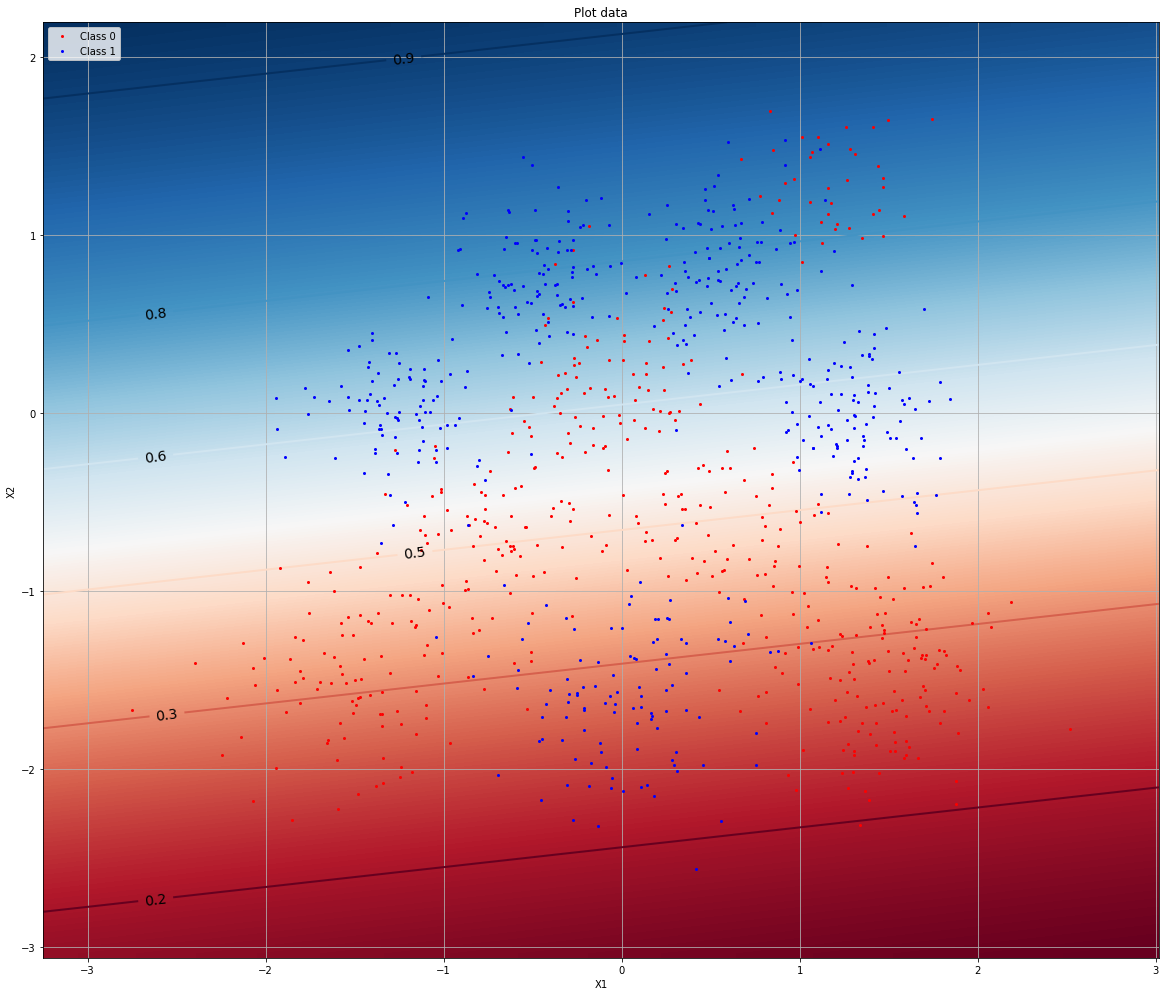

In [8]:
TP, TN, FP, FN = 0,0,0,0
# Xb = np.column_stack([X, np.ones(X.shape[0])])
# for i in range(train_size,X.shape[0]):
for i in range(len(X_test)):
    prediction = 1 if logistic(np.dot(X_test[i,:],w))>0.5 else 0
    if prediction == y_test[i]:
        if y_test[i]==0: TN += 1
        elif y_test[i]==1: TP += 1
    else:
        if y_test[i]==0: FP += 1
        elif y_test[i]==1: FN += 1
print(TN/(TN+FP), FP/(TN+FP))
print(FN/(FN+TP), TP/(FN+TP))
print('precision for label 1:', TP/(TP+FP))
print('recall for label 1:', TP/(TP+FN))
print('accuracy:',(TP+TN)/(1000-train_size))
plot_predictive_distribution(X, y, predict_for_plot)

# Non-linear classifier with Radial basis function

## Gaussian width 0.01

In [9]:
# Gaussian width
l = 0.01

# reference centres Z for Gaussian kernels
# x_min , x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
# y_min , y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5

# xx,yy = np.meshgrid(np.linspace(x_min , x_max , 100),\
#                 np.linspace(y_min , y_max , 100))
# Z = np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)
C = X_shuffled[:train_size,:]

# train set
X_train = expand_inputs(l,X_shuffled[:train_size,:],C)
X_train = np.column_stack([X_train,np.ones(X_train.shape[0])])
y_train = y_shuffled[:train_size]

# test set
X_test = expand_inputs(l,X_shuffled[train_size:,:],C)
X_test = np.column_stack([X_test,np.ones(X_test.shape[0])])
y_test = y_shuffled[train_size:]

In [10]:
#Training
epochs = 1000
w = np.random.randn(X_train.shape[1])
# w = np.zeros(X_train.shape[1])
eta = 0.005
ll_train = []
ll_test = []
for i in range(epochs):
#     eta = 1.0/(i+1000)
    w = w + eta*(np.dot(y_train-logistic(np.dot(X_train, w)).T, X_train))
    
    ll_train.append(compute_average_ll(X_train,y_train,w))
    ll_test.append(compute_average_ll(X_test,y_test,w))
    print('epoch',i,'- fitness to train set:',np.exp(compute_average_ll(X_train,y_train,w)))
ll_train = np.array(ll_train)
ll_test = np.array(ll_test)

epoch 0 - fitness to train set: 0.435719243904
epoch 1 - fitness to train set: 0.438728585877
epoch 2 - fitness to train set: 0.43951159062
epoch 3 - fitness to train set: 0.440226743344
epoch 4 - fitness to train set: 0.440939381307
epoch 5 - fitness to train set: 0.44165142304
epoch 6 - fitness to train set: 0.442362921493
epoch 7 - fitness to train set: 0.44307387495
epoch 8 - fitness to train set: 0.443784280129
epoch 9 - fitness to train set: 0.444494133721
epoch 10 - fitness to train set: 0.445203432443
epoch 11 - fitness to train set: 0.445912173036
epoch 12 - fitness to train set: 0.446620352267
epoch 13 - fitness to train set: 0.447327966927
epoch 14 - fitness to train set: 0.448035013829
epoch 15 - fitness to train set: 0.448741489815
epoch 16 - fitness to train set: 0.449447391749
epoch 17 - fitness to train set: 0.450152716518
epoch 18 - fitness to train set: 0.450857461036
epoch 19 - fitness to train set: 0.451561622241
epoch 20 - fitness to train set: 0.452265197093
epoch

epoch 192 - fitness to train set: 0.562730269867
epoch 193 - fitness to train set: 0.563304458357
epoch 194 - fitness to train set: 0.563877819693
epoch 195 - fitness to train set: 0.564450353702
epoch 196 - fitness to train set: 0.56502206022
epoch 197 - fitness to train set: 0.565592939092
epoch 198 - fitness to train set: 0.566162990172
epoch 199 - fitness to train set: 0.566732213326
epoch 200 - fitness to train set: 0.567300608428
epoch 201 - fitness to train set: 0.56786817536
epoch 202 - fitness to train set: 0.568434914016
epoch 203 - fitness to train set: 0.569000824299
epoch 204 - fitness to train set: 0.569565906119
epoch 205 - fitness to train set: 0.5701301594
epoch 206 - fitness to train set: 0.570693584069
epoch 207 - fitness to train set: 0.571256180068
epoch 208 - fitness to train set: 0.571817947345
epoch 209 - fitness to train set: 0.572378885857
epoch 210 - fitness to train set: 0.572938995572
epoch 211 - fitness to train set: 0.573498276465
epoch 212 - fitness to t

epoch 363 - fitness to train set: 0.649033719971
epoch 364 - fitness to train set: 0.649470363352
epoch 365 - fitness to train set: 0.649906255443
epoch 366 - fitness to train set: 0.650341397124
epoch 367 - fitness to train set: 0.650775789276
epoch 368 - fitness to train set: 0.651209432784
epoch 369 - fitness to train set: 0.651642328536
epoch 370 - fitness to train set: 0.652074477423
epoch 371 - fitness to train set: 0.652505880338
epoch 372 - fitness to train set: 0.652936538178
epoch 373 - fitness to train set: 0.653366451843
epoch 374 - fitness to train set: 0.653795622235
epoch 375 - fitness to train set: 0.654224050259
epoch 376 - fitness to train set: 0.654651736824
epoch 377 - fitness to train set: 0.65507868284
epoch 378 - fitness to train set: 0.655504889221
epoch 379 - fitness to train set: 0.655930356884
epoch 380 - fitness to train set: 0.656355086748
epoch 381 - fitness to train set: 0.656779079735
epoch 382 - fitness to train set: 0.657202336769
epoch 383 - fitness t

epoch 555 - fitness to train set: 0.720228532213
epoch 556 - fitness to train set: 0.720539202812
epoch 557 - fitness to train set: 0.720849318515
epoch 558 - fitness to train set: 0.721158880368
epoch 559 - fitness to train set: 0.721467889416
epoch 560 - fitness to train set: 0.721776346701
epoch 561 - fitness to train set: 0.722084253267
epoch 562 - fitness to train set: 0.722391610157
epoch 563 - fitness to train set: 0.722698418412
epoch 564 - fitness to train set: 0.723004679071
epoch 565 - fitness to train set: 0.723310393176
epoch 566 - fitness to train set: 0.723615561765
epoch 567 - fitness to train set: 0.723920185877
epoch 568 - fitness to train set: 0.724224266548
epoch 569 - fitness to train set: 0.724527804815
epoch 570 - fitness to train set: 0.724830801714
epoch 571 - fitness to train set: 0.72513325828
epoch 572 - fitness to train set: 0.725435175546
epoch 573 - fitness to train set: 0.725736554546
epoch 574 - fitness to train set: 0.726037396312
epoch 575 - fitness t

epoch 745 - fitness to train set: 0.770413773551
epoch 746 - fitness to train set: 0.770636538543
epoch 747 - fitness to train set: 0.770858925927
epoch 748 - fitness to train set: 0.771080936498
epoch 749 - fitness to train set: 0.77130257105
epoch 750 - fitness to train set: 0.771523830375
epoch 751 - fitness to train set: 0.771744715263
epoch 752 - fitness to train set: 0.771965226504
epoch 753 - fitness to train set: 0.772185364883
epoch 754 - fitness to train set: 0.772405131188
epoch 755 - fitness to train set: 0.772624526202
epoch 756 - fitness to train set: 0.772843550709
epoch 757 - fitness to train set: 0.773062205489
epoch 758 - fitness to train set: 0.773280491321
epoch 759 - fitness to train set: 0.773498408985
epoch 760 - fitness to train set: 0.773715959256
epoch 761 - fitness to train set: 0.773933142909
epoch 762 - fitness to train set: 0.774149960718
epoch 763 - fitness to train set: 0.774366413455
epoch 764 - fitness to train set: 0.774582501889
epoch 765 - fitness t

epoch 921 - fitness to train set: 0.804456631475
epoch 922 - fitness to train set: 0.804623833379
epoch 923 - fitness to train set: 0.804790774713
epoch 924 - fitness to train set: 0.804957456018
epoch 925 - fitness to train set: 0.805123877836
epoch 926 - fitness to train set: 0.805290040707
epoch 927 - fitness to train set: 0.805455945169
epoch 928 - fitness to train set: 0.805621591761
epoch 929 - fitness to train set: 0.805786981019
epoch 930 - fitness to train set: 0.805952113477
epoch 931 - fitness to train set: 0.80611698967
epoch 932 - fitness to train set: 0.80628161013
epoch 933 - fitness to train set: 0.806445975388
epoch 934 - fitness to train set: 0.806610085974
epoch 935 - fitness to train set: 0.806773942418
epoch 936 - fitness to train set: 0.806937545246
epoch 937 - fitness to train set: 0.807100894986
epoch 938 - fitness to train set: 0.807263992162
epoch 939 - fitness to train set: 0.807426837299
epoch 940 - fitness to train set: 0.807589430918
epoch 941 - fitness to

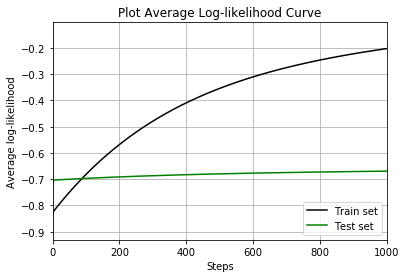

-0.202415590972
-0.669219597623


C:\Users\sykha\Anaconda3\lib\site-packages\matplotlib\contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


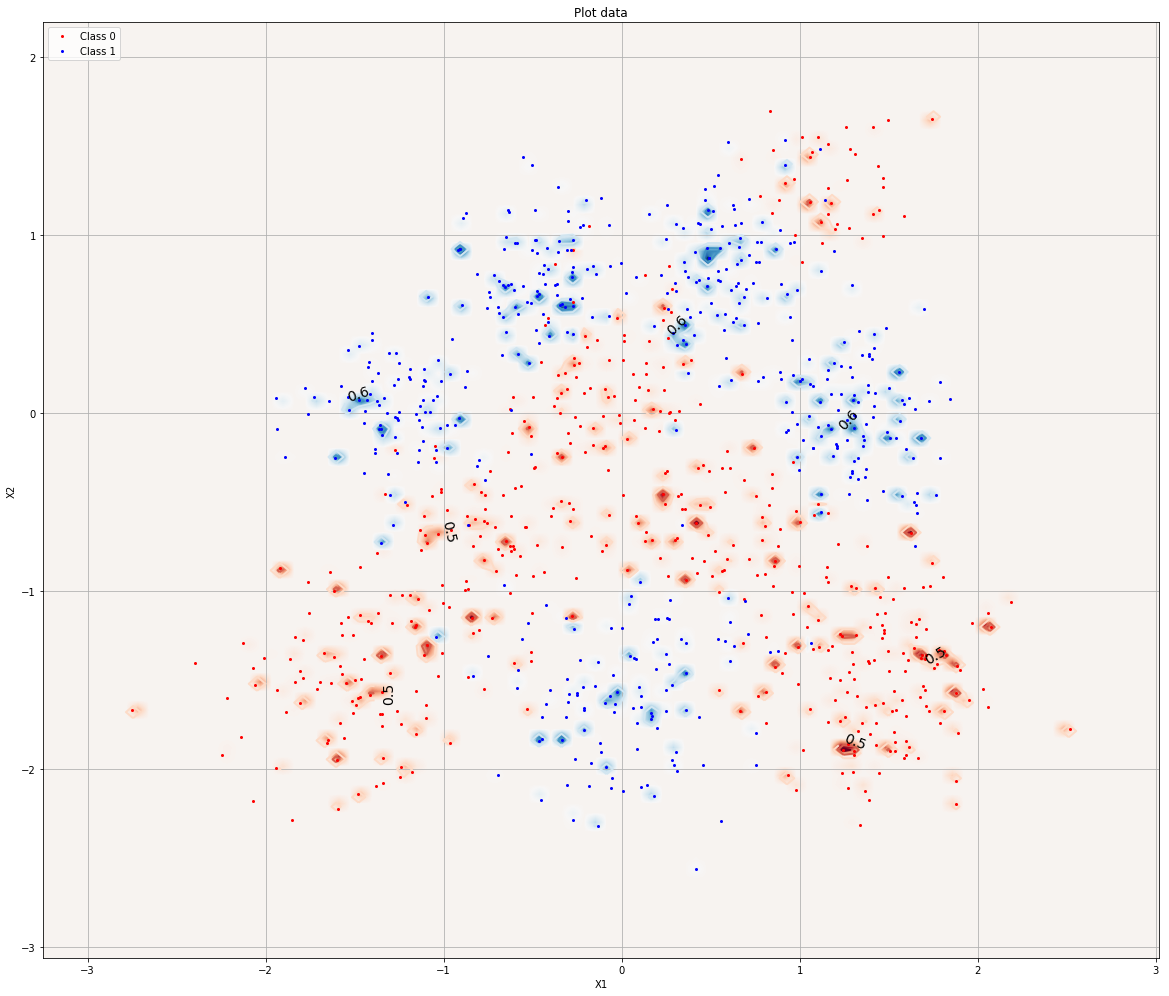

0.9809523809523809 0.01904761904761905
0.7684210526315789 0.23157894736842105
precision for label 1: 0.9166666666666666
recall for label 1: 0.23157894736842105
accuracy: 0.625


In [11]:
plot_ll(ll_train,ll_test)
print(ll_train[-1])
print(ll_test[-1])
plot_predictive_distribution(X,y, predict_for_plot_expanded_features)
TP, TN, FP, FN = 0,0,0,0
# Xb = np.column_stack([X, np.ones(X.shape[0])])
# for i in range(train_size,X.shape[0]):
for i in range(len(X_test)):
    prediction = 1 if logistic(np.dot(X_test[i,:],w))>0.5 else 0
    if prediction == y_test[i]:
        if y_test[i]==0: TN += 1
        elif y_test[i]==1: TP += 1
    else:
        if y_test[i]==0: FP += 1
        elif y_test[i]==1: FN += 1
print(TN/(TN+FP), FP/(TN+FP))
print(FN/(FN+TP), TP/(FN+TP))
print('precision for label 1:', TP/(TP+FP))
print('recall for label 1:', TP/(TP+FN))
print('accuracy:',(TP+TN)/(1000-train_size))

## Gaussian width 0.1

In [12]:
# Gaussian width
l = 0.1

# reference centres Z for Gaussian kernels
# x_min , x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
# y_min , y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5

# xx,yy = np.meshgrid(np.linspace(x_min , x_max , 100),\
#                 np.linspace(y_min , y_max , 100))
# Z = np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)
C = X_shuffled[:train_size,:]

# train set
X_train = expand_inputs(l,X_shuffled[:train_size,:],C)
X_train = np.column_stack([X_train,np.ones(X_train.shape[0])])
y_train = y_shuffled[:train_size]

# test set
X_test = expand_inputs(l,X_shuffled[train_size:,:],C)
X_test = np.column_stack([X_test,np.ones(X_test.shape[0])])
y_test = y_shuffled[train_size:]

In [13]:
#Training
epochs = 1000
w = np.random.randn(X_train.shape[1])
# w = np.zeros(X_train.shape[1])
eta = 0.0005
ll_train = []
ll_test = []
for i in range(epochs):
#     eta = 1.0/(i+1000)
    w = w + eta*(np.dot(y_train-logistic(np.dot(X_train, w)).T, X_train))
    
    ll_train.append(compute_average_ll(X_train,y_train,w))
    ll_test.append(compute_average_ll(X_test,y_test,w))
    print('epoch',i,'- fitness to train set:',np.exp(compute_average_ll(X_train,y_train,w)))
ll_train = np.array(ll_train)
ll_test = np.array(ll_test)

epoch 0 - fitness to train set: 0.323308890533
epoch 1 - fitness to train set: 0.327036402418
epoch 2 - fitness to train set: 0.330557041588
epoch 3 - fitness to train set: 0.333888408197
epoch 4 - fitness to train set: 0.337047165845
epoch 5 - fitness to train set: 0.340048961153
epoch 6 - fitness to train set: 0.342908381046
epoch 7 - fitness to train set: 0.3456389402
epoch 8 - fitness to train set: 0.348253091964
epoch 9 - fitness to train set: 0.350762257042
epoch 10 - fitness to train set: 0.353176865107
epoch 11 - fitness to train set: 0.355506405327
epoch 12 - fitness to train set: 0.357759482603
epoch 13 - fitness to train set: 0.35994387692
epoch 14 - fitness to train set: 0.362066603825
epoch 15 - fitness to train set: 0.364133974492
epoch 16 - fitness to train set: 0.366151654267
epoch 17 - fitness to train set: 0.368124718863
epoch 18 - fitness to train set: 0.370057707685
epoch 19 - fitness to train set: 0.371954673926
epoch 20 - fitness to train set: 0.373819231257
epoch

epoch 205 - fitness to train set: 0.596409428426
epoch 206 - fitness to train set: 0.597142371012
epoch 207 - fitness to train set: 0.597870983382
epoch 208 - fitness to train set: 0.598595290537
epoch 209 - fitness to train set: 0.599315317731
epoch 210 - fitness to train set: 0.600031090458
epoch 211 - fitness to train set: 0.60074263444
epoch 212 - fitness to train set: 0.601449975614
epoch 213 - fitness to train set: 0.602153140123
epoch 214 - fitness to train set: 0.602852154301
epoch 215 - fitness to train set: 0.603547044663
epoch 216 - fitness to train set: 0.604237837895
epoch 217 - fitness to train set: 0.604924560837
epoch 218 - fitness to train set: 0.605607240475
epoch 219 - fitness to train set: 0.60628590393
epoch 220 - fitness to train set: 0.606960578443
epoch 221 - fitness to train set: 0.607631291364
epoch 222 - fitness to train set: 0.608298070145
epoch 223 - fitness to train set: 0.608960942323
epoch 224 - fitness to train set: 0.609619935511
epoch 225 - fitness to

epoch 373 - fitness to train set: 0.677760779636
epoch 374 - fitness to train set: 0.678082805754
epoch 375 - fitness to train set: 0.67840363228
epoch 376 - fitness to train set: 0.678723267025
epoch 377 - fitness to train set: 0.67904171773
epoch 378 - fitness to train set: 0.67935899206
epoch 379 - fitness to train set: 0.679675097608
epoch 380 - fitness to train set: 0.679990041896
epoch 381 - fitness to train set: 0.680303832376
epoch 382 - fitness to train set: 0.680616476429
epoch 383 - fitness to train set: 0.680927981368
epoch 384 - fitness to train set: 0.681238354439
epoch 385 - fitness to train set: 0.681547602818
epoch 386 - fitness to train set: 0.681855733616
epoch 387 - fitness to train set: 0.682162753879
epoch 388 - fitness to train set: 0.682468670587
epoch 389 - fitness to train set: 0.682773490657
epoch 390 - fitness to train set: 0.683077220942
epoch 391 - fitness to train set: 0.683379868232
epoch 392 - fitness to train set: 0.683681439255
epoch 393 - fitness to 

epoch 541 - fitness to train set: 0.719405265558
epoch 542 - fitness to train set: 0.719597352678
epoch 543 - fitness to train set: 0.719788946066
epoch 544 - fitness to train set: 0.719980047856
epoch 545 - fitness to train set: 0.720170660167
epoch 546 - fitness to train set: 0.720360785106
epoch 547 - fitness to train set: 0.720550424767
epoch 548 - fitness to train set: 0.720739581229
epoch 549 - fitness to train set: 0.72092825656
epoch 550 - fitness to train set: 0.721116452814
epoch 551 - fitness to train set: 0.721304172034
epoch 552 - fitness to train set: 0.721491416247
epoch 553 - fitness to train set: 0.721678187471
epoch 554 - fitness to train set: 0.721864487711
epoch 555 - fitness to train set: 0.722050318956
epoch 556 - fitness to train set: 0.722235683188
epoch 557 - fitness to train set: 0.722420582374
epoch 558 - fitness to train set: 0.722605018469
epoch 559 - fitness to train set: 0.722788993417
epoch 560 - fitness to train set: 0.72297250915
epoch 561 - fitness to

epoch 714 - fitness to train set: 0.746722405761
epoch 715 - fitness to train set: 0.746852433191
epoch 716 - fitness to train set: 0.74698220201
epoch 717 - fitness to train set: 0.747111713058
epoch 718 - fitness to train set: 0.747240967171
epoch 719 - fitness to train set: 0.747369965182
epoch 720 - fitness to train set: 0.747498707919
epoch 721 - fitness to train set: 0.747627196208
epoch 722 - fitness to train set: 0.747755430869
epoch 723 - fitness to train set: 0.74788341272
epoch 724 - fitness to train set: 0.748011142575
epoch 725 - fitness to train set: 0.748138621243
epoch 726 - fitness to train set: 0.748265849531
epoch 727 - fitness to train set: 0.74839282824
epoch 728 - fitness to train set: 0.748519558171
epoch 729 - fitness to train set: 0.748646040118
epoch 730 - fitness to train set: 0.748772274873
epoch 731 - fitness to train set: 0.748898263223
epoch 732 - fitness to train set: 0.749024005954
epoch 733 - fitness to train set: 0.749149503847
epoch 734 - fitness to 

epoch 883 - fitness to train set: 0.76558387642
epoch 884 - fitness to train set: 0.765679683667
epoch 885 - fitness to train set: 0.765775333455
epoch 886 - fitness to train set: 0.765870826206
epoch 887 - fitness to train set: 0.765966162334
epoch 888 - fitness to train set: 0.766061342257
epoch 889 - fitness to train set: 0.766156366387
epoch 890 - fitness to train set: 0.766251235139
epoch 891 - fitness to train set: 0.766345948922
epoch 892 - fitness to train set: 0.766440508147
epoch 893 - fitness to train set: 0.766534913222
epoch 894 - fitness to train set: 0.766629164553
epoch 895 - fitness to train set: 0.766723262546
epoch 896 - fitness to train set: 0.766817207603
epoch 897 - fitness to train set: 0.766911000128
epoch 898 - fitness to train set: 0.767004640521
epoch 899 - fitness to train set: 0.767098129182
epoch 900 - fitness to train set: 0.767191466507
epoch 901 - fitness to train set: 0.767284652894
epoch 902 - fitness to train set: 0.767377688738
epoch 903 - fitness t

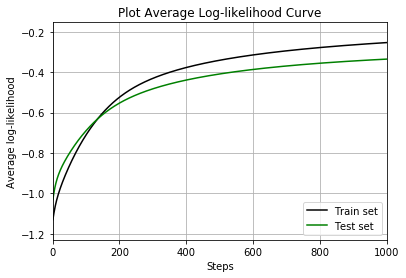

-0.253933410688
-0.33566524578


C:\Users\sykha\Anaconda3\lib\site-packages\matplotlib\contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


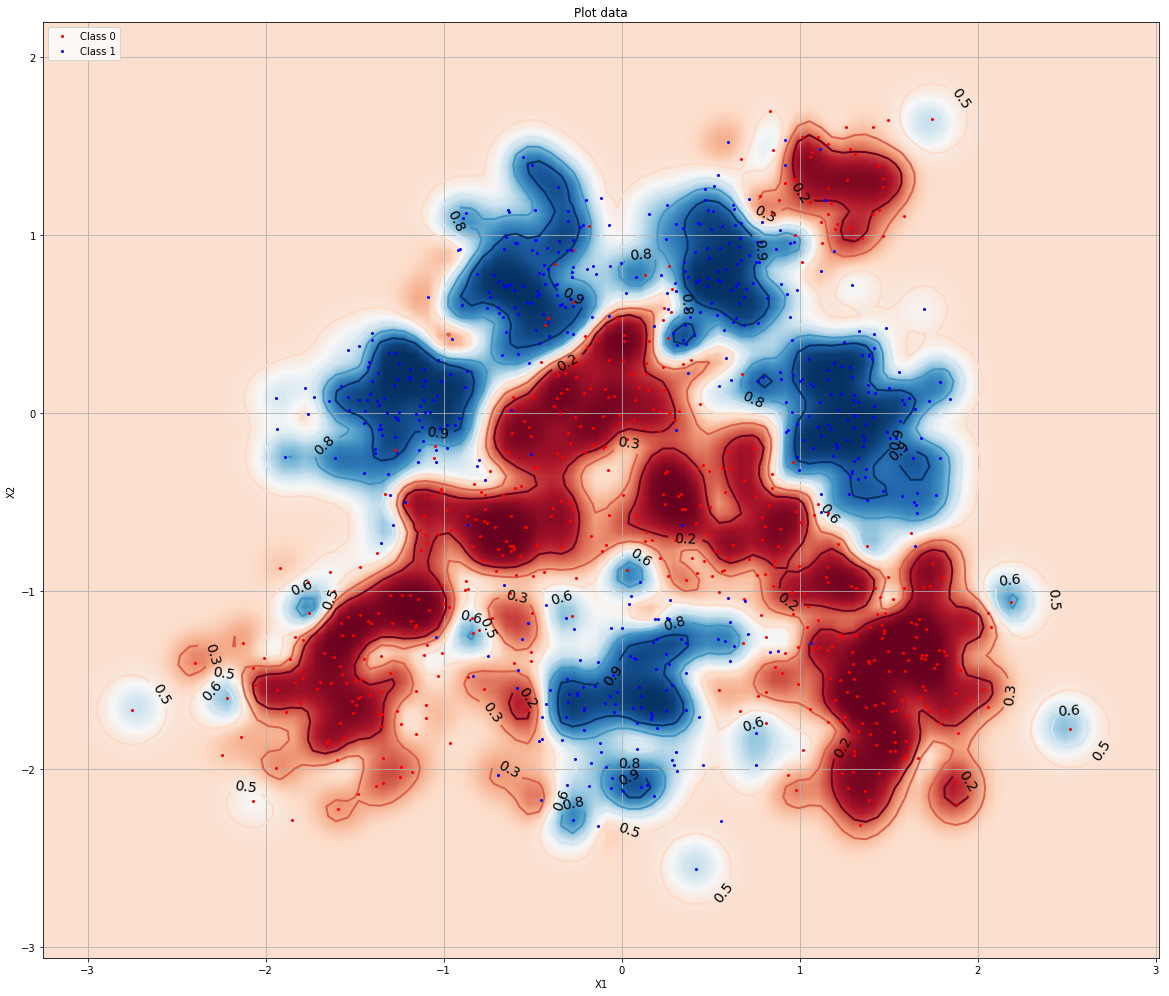

0.9238095238095239 0.0761904761904762
0.1368421052631579 0.8631578947368421
precision for label 1: 0.9111111111111111
recall for label 1: 0.8631578947368421
accuracy: 0.895


In [14]:
plot_ll(ll_train,ll_test)
print(ll_train[-1])
print(ll_test[-1])
plot_predictive_distribution(X,y, predict_for_plot_expanded_features)
TP, TN, FP, FN = 0,0,0,0
# Xb = np.column_stack([X, np.ones(X.shape[0])])
# for i in range(train_size,X.shape[0]):
for i in range(len(X_test)):
    prediction = 1 if logistic(np.dot(X_test[i,:],w))>0.5 else 0
    if prediction == y_test[i]:
        if y_test[i]==0: TN += 1
        elif y_test[i]==1: TP += 1
    else:
        if y_test[i]==0: FP += 1
        elif y_test[i]==1: FN += 1
print(TN/(TN+FP), FP/(TN+FP))
print(FN/(FN+TP), TP/(FN+TP))
print('precision for label 1:', TP/(TP+FP))
print('recall for label 1:', TP/(TP+FN))
print('accuracy:',(TP+TN)/(1000-train_size))

## Gaussian width 1

In [15]:
# Gaussian width
l = 1

# reference centres Z for Gaussian kernels
# x_min , x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
# y_min , y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5

# xx,yy = np.meshgrid(np.linspace(x_min , x_max , 100),\
#                 np.linspace(y_min , y_max , 100))
# Z = np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)
C = X_shuffled[:train_size,:]

# train set
X_train = expand_inputs(l,X_shuffled[:train_size,:],C)
X_train = np.column_stack([X_train,np.ones(X_train.shape[0])])
y_train = y_shuffled[:train_size]

# test set
X_test = expand_inputs(l,X_shuffled[train_size:,:],C)
X_test = np.column_stack([X_test,np.ones(X_test.shape[0])])
y_test = y_shuffled[train_size:]

In [16]:
#Training
epochs = 1000
w = np.random.randn(X_train.shape[1])
# w = np.zeros(X_train.shape[1])
eta = 0.00005
ll_train = []
ll_test = []
for i in range(epochs):
#     eta = 1.0/(i+10000)
    w = w + eta*(np.dot(y_train-logistic(np.dot(X_train, w)).T, X_train))
    
    ll_train.append(compute_average_ll(X_train,y_train,w))
    ll_test.append(compute_average_ll(X_test,y_test,w))
    print('epoch',i,'- fitness to train set:',np.exp(compute_average_ll(X_train,y_train,w)))
ll_train = np.array(ll_train)
ll_test = np.array(ll_test)


epoch 0 - fitness to train set: 0.00691292522582
epoch 1 - fitness to train set: 0.00822115950625
epoch 2 - fitness to train set: 0.00964235754157
epoch 3 - fitness to train set: 0.0111800703021
epoch 4 - fitness to train set: 0.0128402463081
epoch 5 - fitness to train set: 0.0146299104668
epoch 6 - fitness to train set: 0.0165564633933
epoch 7 - fitness to train set: 0.0186271896686
epoch 8 - fitness to train set: 0.0208490554637
epoch 9 - fitness to train set: 0.0232288004405
epoch 10 - fitness to train set: 0.0257731193778
epoch 11 - fitness to train set: 0.0284887620432
epoch 12 - fitness to train set: 0.0313825133209
epoch 13 - fitness to train set: 0.0344610738848
epoch 14 - fitness to train set: 0.0377308675903
epoch 15 - fitness to train set: 0.041197803144
epoch 16 - fitness to train set: 0.044867007695
epoch 17 - fitness to train set: 0.0487425360572
epoch 18 - fitness to train set: 0.0528270661278
epoch 19 - fitness to train set: 0.0571216168206
epoch 20 - fitness to train s

epoch 190 - fitness to train set: 0.587778843743
epoch 191 - fitness to train set: 0.588827256097
epoch 192 - fitness to train set: 0.589863234391
epoch 193 - fitness to train set: 0.590886975132
epoch 194 - fitness to train set: 0.591898672168
epoch 195 - fitness to train set: 0.592898516645
epoch 196 - fitness to train set: 0.593886696962
epoch 197 - fitness to train set: 0.594863398749
epoch 198 - fitness to train set: 0.595828804834
epoch 199 - fitness to train set: 0.596783095231
epoch 200 - fitness to train set: 0.597726447123
epoch 201 - fitness to train set: 0.598659034859
epoch 202 - fitness to train set: 0.599581029947
epoch 203 - fitness to train set: 0.600492601062
epoch 204 - fitness to train set: 0.601393914046
epoch 205 - fitness to train set: 0.602285131928
epoch 206 - fitness to train set: 0.603166414927
epoch 207 - fitness to train set: 0.604037920481
epoch 208 - fitness to train set: 0.60489980326
epoch 209 - fitness to train set: 0.605752215192
epoch 210 - fitness t

epoch 363 - fitness to train set: 0.676244226568
epoch 364 - fitness to train set: 0.676491460939
epoch 365 - fitness to train set: 0.676737265442
epoch 366 - fitness to train set: 0.676981653464
epoch 367 - fitness to train set: 0.677224638237
epoch 368 - fitness to train set: 0.677466232833
epoch 369 - fitness to train set: 0.677706450171
epoch 370 - fitness to train set: 0.67794530302
epoch 371 - fitness to train set: 0.678182803995
epoch 372 - fitness to train set: 0.678418965565
epoch 373 - fitness to train set: 0.678653800054
epoch 374 - fitness to train set: 0.67888731964
epoch 375 - fitness to train set: 0.679119536361
epoch 376 - fitness to train set: 0.679350462113
epoch 377 - fitness to train set: 0.679580108655
epoch 378 - fitness to train set: 0.679808487612
epoch 379 - fitness to train set: 0.680035610469
epoch 380 - fitness to train set: 0.680261488585
epoch 381 - fitness to train set: 0.680486133184
epoch 382 - fitness to train set: 0.680709555363
epoch 383 - fitness to

epoch 537 - fitness to train set: 0.705346593031
epoch 538 - fitness to train set: 0.70546198324
epoch 539 - fitness to train set: 0.705576995445
epoch 540 - fitness to train set: 0.705691631951
epoch 541 - fitness to train set: 0.705805895044
epoch 542 - fitness to train set: 0.705919786987
epoch 543 - fitness to train set: 0.706033310029
epoch 544 - fitness to train set: 0.706146466395
epoch 545 - fitness to train set: 0.706259258295
epoch 546 - fitness to train set: 0.706371687919
epoch 547 - fitness to train set: 0.706483757438
epoch 548 - fitness to train set: 0.706595469005
epoch 549 - fitness to train set: 0.706706824756
epoch 550 - fitness to train set: 0.706817826808
epoch 551 - fitness to train set: 0.70692847726
epoch 552 - fitness to train set: 0.707038778196
epoch 553 - fitness to train set: 0.707148731679
epoch 554 - fitness to train set: 0.707258339758
epoch 555 - fitness to train set: 0.707367604464
epoch 556 - fitness to train set: 0.70747652781
epoch 557 - fitness to 

epoch 711 - fitness to train set: 0.721190866178
epoch 712 - fitness to train set: 0.721263552085
epoch 713 - fitness to train set: 0.72133608039
epoch 714 - fitness to train set: 0.72140845174
epoch 715 - fitness to train set: 0.721480666778
epoch 716 - fitness to train set: 0.721552726143
epoch 717 - fitness to train set: 0.72162463047
epoch 718 - fitness to train set: 0.72169638039
epoch 719 - fitness to train set: 0.721767976529
epoch 720 - fitness to train set: 0.721839419512
epoch 721 - fitness to train set: 0.721910709958
epoch 722 - fitness to train set: 0.721981848482
epoch 723 - fitness to train set: 0.722052835697
epoch 724 - fitness to train set: 0.72212367221
epoch 725 - fitness to train set: 0.722194358628
epoch 726 - fitness to train set: 0.722264895549
epoch 727 - fitness to train set: 0.722335283573
epoch 728 - fitness to train set: 0.722405523292
epoch 729 - fitness to train set: 0.722475615297
epoch 730 - fitness to train set: 0.722545560174
epoch 731 - fitness to tr

epoch 892 - fitness to train set: 0.732273831455
epoch 893 - fitness to train set: 0.732325676008
epoch 894 - fitness to train set: 0.73237743658
epoch 895 - fitness to train set: 0.732429113418
epoch 896 - fitness to train set: 0.732480706768
epoch 897 - fitness to train set: 0.732532216876
epoch 898 - fitness to train set: 0.732583643986
epoch 899 - fitness to train set: 0.732634988343
epoch 900 - fitness to train set: 0.732686250186
epoch 901 - fitness to train set: 0.732737429759
epoch 902 - fitness to train set: 0.7327885273
epoch 903 - fitness to train set: 0.732839543049
epoch 904 - fitness to train set: 0.732890477244
epoch 905 - fitness to train set: 0.73294133012
epoch 906 - fitness to train set: 0.732992101915
epoch 907 - fitness to train set: 0.733042792863
epoch 908 - fitness to train set: 0.733093403197
epoch 909 - fitness to train set: 0.733143933149
epoch 910 - fitness to train set: 0.733194382953
epoch 911 - fitness to train set: 0.733244752837
epoch 912 - fitness to t

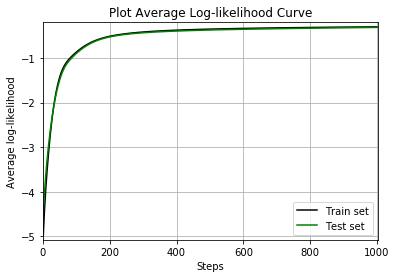

-0.304639754856
-0.317818301184


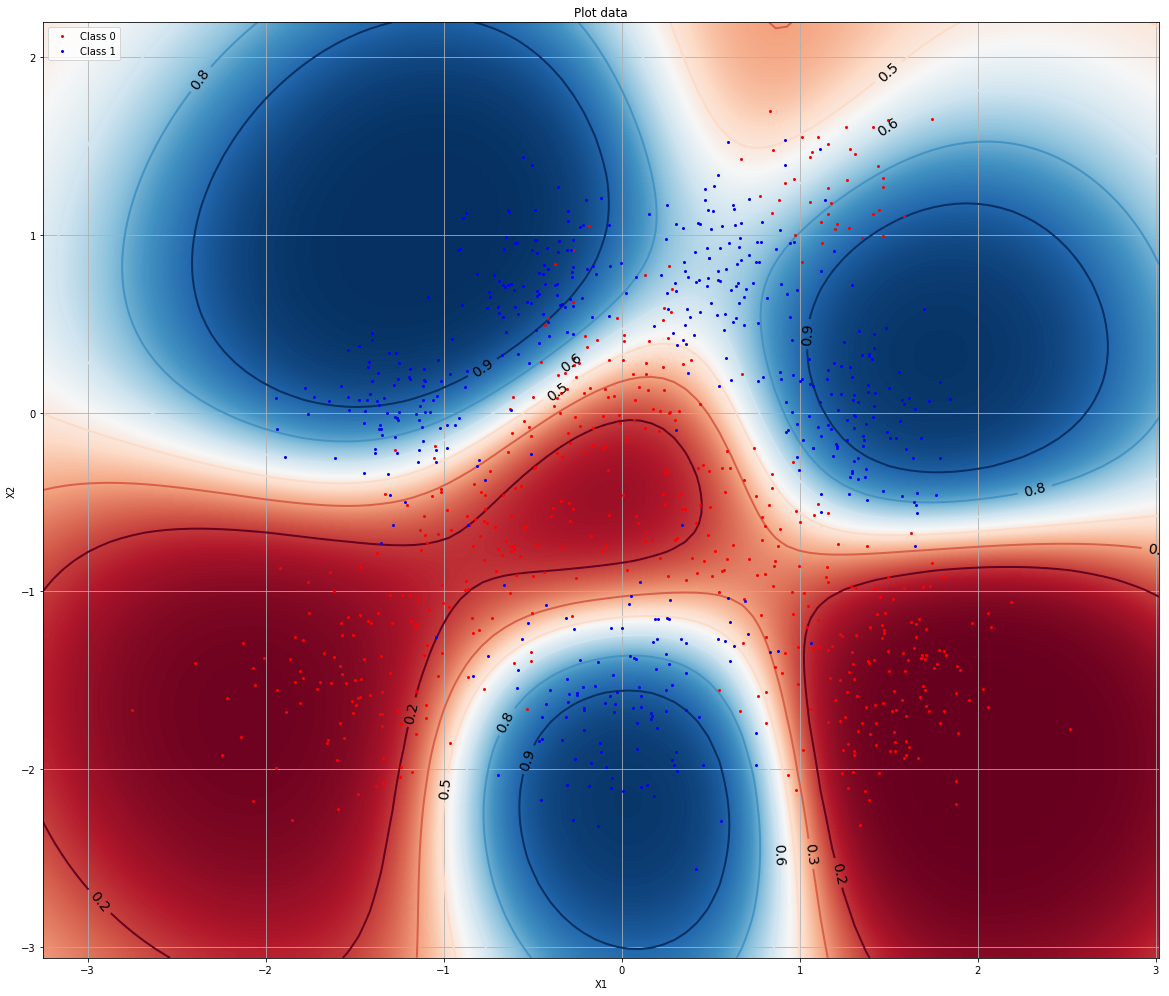

0.8571428571428571 0.14285714285714285
0.09473684210526316 0.9052631578947369
precision for label 1: 0.8514851485148515
recall for label 1: 0.9052631578947369
accuracy: 0.88


In [17]:
plot_ll(ll_train,ll_test)
print(ll_train[-1])
print(ll_test[-1])
plot_predictive_distribution(X,y, predict_for_plot_expanded_features)
TP, TN, FP, FN = 0,0,0,0
# Xb = np.column_stack([X, np.ones(X.shape[0])])
# for i in range(train_size,X.shape[0]):
for i in range(len(X_test)):
    prediction = 1 if logistic(np.dot(X_test[i,:],w))>0.5 else 0
    if prediction == y_test[i]:
        if y_test[i]==0: TN += 1
        elif y_test[i]==1: TP += 1
    else:
        if y_test[i]==0: FP += 1
        elif y_test[i]==1: FN += 1
print(TN/(TN+FP), FP/(TN+FP))
print(FN/(FN+TP), TP/(FN+TP))
print('precision for label 1:', TP/(TP+FP))
print('recall for label 1:', TP/(TP+FN))
print('accuracy:',(TP+TN)/(1000-train_size))